In [1]:
import io
from IPython.display import display
import fileupload

fin = '';
_upload_widget = fileupload.FileUploadWidget()

def _cb(change):
    global fin
    decoded = io.StringIO(change['owner'].data.decode('utf-8'))
    filename = change['owner'].filename
    fin = filename;
    print('Uploaded `{}` ({:.2f} kB)'.format(
        filename, len(decoded.read()) / 2 **10))

_upload_widget.observe(_cb, names='data')
display(_upload_widget)

Uploaded `input.txt` (0.05 kB)


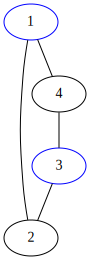

In [4]:
import problem2.main as p2
import graphviz as gv

f = open("problem2/" + fin, "r")
lines = [ line for line in f ]
n, m = lines[0].split()
n = int(n)
m = int(m)
a, b = lines[m + 1].split()
a = int(a) - 1
b = int(b) - 1

dot = gv.Graph(comment = "test")

for v in range(1, n + 1):
    vcolor = "blue" if (v == a + 1 or v == b + 1) else "black"
    dot.node(str(v), color=vcolor)

for i in range(1, m + 1):
    u, v = lines[i].split()
    dot.edge(str(int(u)), str(int(v)))
dot

[1, 2, 3]


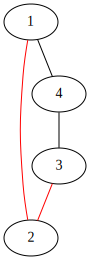

In [5]:

G = p2.graph_init(lines, n, m)
path = p2.solve(G, a, b)
print(path)

dot = gv.Graph(comment = "test")


for v in range(1, n + 1):
    vcolor="black"
    if (v in path):
        vcolor="red"
    dot.node(str(v), color=vcolor)
    
for i in range(1, m + 1):
    u, v = lines[i].split()
    ecolor = "black"
    for i in range(len(path) - 1):
        j = i + 1
        if (path[i] == int(u) and path[j] == int(v)) or (path[i] == int(v) and path[j] == int(u)):
            ecolor = "red"
            break
    dot.edge(u, v, color = ecolor)

dot
